In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve

In [2]:
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [3]:
from wrapper import solve_numeric

In [4]:
from wrapper import EQ1, EQ2, EQ3, EQ4

Define symbols for two codon model

In [5]:
Tt1, Tt2, Tc1, Tc2, Rb1, Rb2, fopt = symbols('Tt1 Tt2 Tc1 Tc2 Rb1 Rb2 fopt')
Rt, Rb, Tt, Tc, N, L, Ksp, Kbd, Kch = symbols('Rt Rb Tt Tc N L Ksp Kbd Kch')

In [6]:
EQ1 # ribosome on-off rate equilibrium

Eq(Kbd*N*(-Rb1 - Rb2 + Rt), Ksp*(Rb1*Tc1 + Rb2*Tc2)/L)

In [7]:
EQ2 # ribosome flux between codons

Eq(Rb1*Tc1*(1 - fopt), Rb2*Tc2*fopt)

In [8]:
EQ3 # charging-uncharging for tRNA 1

Eq(Kch*(-Tc1 + Tt1), Ksp*Rb1*Tc1)

In [9]:
EQ4 # charging-uncharging for tRNA 2

Eq(Kch*(-Tc2 + Tt2), Ksp*Rb2*Tc2)

In [6]:
# conversion for kbd used by Pinetree simulations
# necessary to make simulations agree with numeric solutions
def rbs_conversion(rbs):
    AVOGADRO = 6.02214076e23
    VOLUME = 8e-16
    return round(rbs / (AVOGADRO * VOLUME), 10)

### Solve with 70:30 tRNA ratio 

In [8]:
#RBS_STRENGTH = rbs_conversion(30000000)
fixed_params = {N: 100,
       Kbd: 0.005,
       #Kbd: 0.0001,
       #Kch: 10,
       Rt: 500,
       Tt1: 1750,
       Tt2: 750,
       Ksp: 0.02,
       #Ksp: 0.0004,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_05 = solve_numeric(fixed_params, Kch, vals, name="kch")

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 300}


In [9]:
# normalize colorscale values for plotting on log scale
norm = LogNorm(vmin=vals[0], vmax=vals[-1]) 

In [10]:
df_05["protein_expr_rate"] = df_05["protein"] / 100

In [11]:
df_05["Rf"] = 500 - df_05["Rb"]

In [12]:
L_codons = 300
# formula for calculating the ave. ribosome speed in codons / s
df_05["codons_per_second"] = (df_05["protein_expr_rate"] * L_codons) / df_05["Rb"]

In [13]:
# formula for the ribosome density per 100 nucleotides
df_05["ribo_per_100_nt"] = (df_05["Rb"] / 100) / 9

In [19]:
df_05["nonopt_codons_per_second"] = (df_05["protein_expr_rate"] * L_codons * (1 - df_05["fopt"])) / df_05["rb2"]

In [20]:
df_05["opt_codons_per_second"] = (df_05["protein_expr_rate"] * L_codons * df_05["fopt"]) / df_05["rb1"]

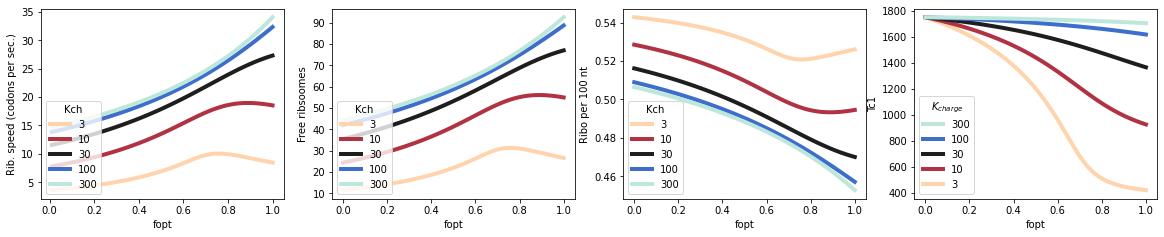

In [15]:
rcParams['figure.figsize'] = [20, 3.5]
fig, ax = plt.subplots(1, 4)

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="codons_per_second", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[0]
                 )
g1.set_ylabel("Rib. speed (codons per sec.)")
g1.legend(title="Kch", loc="lower left")

g2 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="Rf", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[1]
                 )
g2.set_ylabel("Free ribsoomes")
g2.legend(title="Kch", loc="lower left")

g3 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="ribo_per_100_nt", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[2]
                 )
g3.set_ylabel("Ribo per 100 nt")
g3.legend(title="Kch", loc="lower left")

g4 = sns.lineplot(data=df_05, 
                  x="fopt", 
                  y="tc1", 
                  hue="kch", 
                  hue_norm=norm, 
                  palette=palette, 
                  linewidth=4,
                 ax=ax[3])
g4.set_ylabel("Tc1")
g4.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

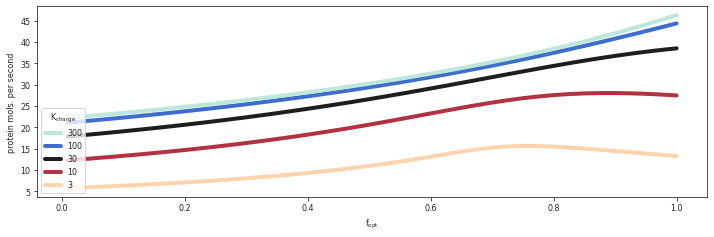

In [16]:
plt.rcParams['figure.figsize'] = [12, 3.5]
plt.rcParams["text.usetex"] = False
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="protein_expr_rate", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4)
g1.set_xlabel(r"$f_{opt}$")
g1.set_ylabel("protein mols. per second")
g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

In [17]:
df_05[(df_05.kch == 30)].mean()

fopt                    0.500000
rb1                   155.015046
rb2                   290.356063
tc1                  1594.639039
tc2                   632.216508
kch                    30.000000
tu1                   155.360961
tu2                   117.783492
protein              2741.024546
Rb                    445.371109
Tc                   2226.855547
protein_expr_rate      27.410245
Rf                     54.628891
codons_per_second      18.612994
ribo_per_100_nt         0.494857
dtype: float64

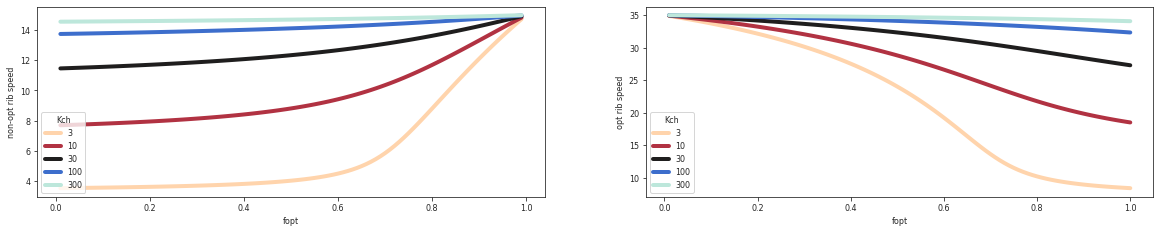

In [23]:
rcParams['figure.figsize'] = [20, 3.5]
fig, ax = plt.subplots(1, 2)

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="nonopt_codons_per_second", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[0]
                 )
g1.set_ylabel("non-opt rib speed")
g1.legend(title="Kch", loc="lower left")

g2 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="opt_codons_per_second", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[1]
                 )
g2.set_ylabel("opt rib speed")
g2.legend(title="Kch", loc="lower left")

In [26]:
df_05[("rib_speed_ratio")] = df_05["opt_codons_per_second"] / (df_05["opt_codons_per_second"] + df_05["nonopt_codons_per_second"])
df_05[(df_05.kch == 10) & (df_05.fopt > 0.8)]

,fopt,rb1,rb2,tc1,tc2,kch,tu1,tu2,protein,Rb,Tc,protein_expr_rate,Rf,codons_per_second,ribo_per_100_nt,nonopt_codons_per_second,opt_codons_per_second,rib_speed_ratio
182,0.81,311.655829,133.039079,1078.043141,592.380490,10,671.956859,157.619510,2765.254562,444.694909,1670.423631,27.652546,55.305091,18.654955,0.494105,11.847610,21.560863,0.645371
183,0.82,319.693902,124.815988,1067.471648,600.176703,10,682.528352,149.823297,2774.505496,444.509890,1667.648351,27.745055,55.490110,18.725155,0.493900,12.003534,21.349433,0.640106
184,0.83,327.673888,116.677892,1057.179660,608.097039,10,692.820340,141.902961,2782.411002,444.351780,1665.276699,27.824110,55.648220,18.785191,0.493724,12.161941,21.143593,0.634837
185,0.84,335.581141,108.639127,1047.175381,616.128644,10,702.824619,133.871356,2788.986583,444.220268,1663.304025,27.889866,55.779732,18.835160,0.493578,12.322573,20.943508,0.629575
186,0.85,343.402175,100.712705,1037.464719,624.258480,10,712.535281,125.741520,2794.256006,444.114880,1661.723198,27.942560,55.885120,18.875224,0.493461,12.485170,20.749294,0.624331
187,0.86,351.124760,92.910232,1028.051399,632.473484,10,721.948601,117.526516,2798.250392,444.034992,1660.524882,27.982504,55.965008,18.905607,0.493372,12.649470,20.561028,0.619112
188,0.87,358.737986,85.241869,1018.937108,640.760717,10,731.062892,109.239283,2801.007248,443.979855,1659.697826,28.010072,56.020145,18.926583,0.493311,12.815214,20.378742,0.613929
189,0.88,366.232285,77.716326,1010.121667,649.107500,10,739.878333,100.892500,2802.569443,443.948611,1659.229167,28.025694,56.051389,18.938472,0.493276,12.982150,20.202433,0.608790
190,0.89,373.599430,70.340886,1001.603217,657.501521,10,748.396783,92.498479,2802.984204,443.940316,1659.104739,28.029842,56.059684,18.941629,0.493267,13.150030,20.032064,0.603701
191,0.90,380.832499,63.121459,993.378425,665.930936,10,756.621575,84.069064,2802.302131,443.953957,1659.309361,28.023021,56.046043,18.936438,0.493282,13.318619,19.867568,0.598670
